In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
x = np.array(df['Open']).reshape(-1,1)
y = df['Close']


In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3899, 1) (975, 1) (3899,) (975,)


In [7]:
ln = LinearRegression()

In [8]:
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("score: ",ln.score(X_test,y_test)*100)

score:  99.95371428571899


In [10]:
print("Score of trainin data: ",ln.score(X_train,y_train)*100)

Score of trainin data:  99.93855785198072


In [11]:
test  = np.array(x[0]).reshape(-1,1)
test

array([[1.156429]])

In [12]:
ln.predict(test)

array([1.20908488])

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
y_pred = ln.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

11.227087007820518

In [15]:
np.sqrt(mse)

3.3506845580896627

#Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [21]:
ls = Lasso()
param = {'alpha':[1e-30,1e-20,1e-18,1e-15,1e-10,1e-8,1e-3,1e-2]}
lasso_regressor = GridSearchCV(ls,param,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34602.88233889168, tolerance: 10576.397378701584
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34600.07366050153, tolerance: 10625.702441606496
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34365.133543164084, tolerance: 11031.085210635869
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32660.71

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-30, 1e-20, 1e-18, 1e-15, 1e-10, 1e-08,
                                   0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [22]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-30}
-14.213770817307275


#Ridge Regressor

In [23]:
from sklearn.linear_model import Ridge
rg = Ridge()
param = {'alpha':[1e-30,1e-20,1e-18,1e-15,1e-10,1e-8,1e-3,1e-2]}
ridge_regressor = GridSearchCV(rg,param,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-30, 1e-20, 1e-18, 1e-15, 1e-10, 1e-08,
                                   0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-30}
-14.213770817307273


In [25]:
l_pred = lasso_regressor.predict(X_test)
r_pred = ridge_regressor.predict(X_test)

In [28]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


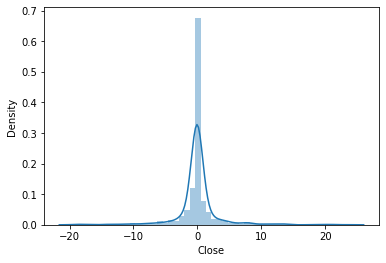

In [29]:
sns.distplot(y_test-l_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


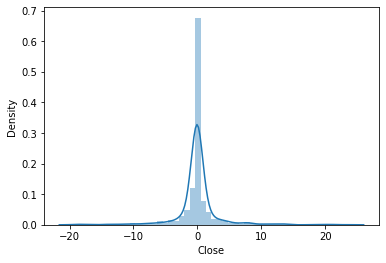

In [30]:
sns.distplot(y_test-r_pred)

In [31]:
lasso_regressor.predict(test)

array([1.19272379])

In [33]:
ridge_regressor.predict(test)

array([1.19272379])